In [ ]:
'''Mediapipe introduction - MediaPipe is an open-source framework developed by Google that provides a
simplified and efficient way to build various types of multimedia applications,
particularly those related to computer vision and machine learning. '''

#in this block we are importing all the required modules
''' import math - math functions and constants
    import cv2 - particularly for machine and deep learning
    import numpy - for working with image data
    import mediapipe - framework developed by Google and is open sourced. Provide simplified and efficient way to build application.
    import time - allow us to measure the time taken for certain operation in the code
'''

!pip install mediapipe
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
#block 1
'''
line 1 - mp stands for mediapipe
         solution stands for prebuilt solution or tools for different computer vision tasks
         pose is one of the prebuilt solution designed for analysing human body pose
         this is stored in mp_pose
line 2 - Pose takes 3 parameters like
         -> static_image_mode = True which indicates that we are going to work with pictures
         -> min_detection_confidence = 0.3 which means that the model should tell if it detects 30% image rightly
         -> model_complexity = 2 which means that telling the computer to capture more details of how people are positioned
         Model complexity can typically range from 0 to 2, with 2 being the most complex and accurate.
         It typically involves larger and more sophisticated neural network architectures with more parameters

The summary of Line1 and Line2 is
This code initializes a pose detection model from MediaPipe configured for processing static images with a minimum detection confidence of 0.3 and a model complexity level of 2.

line 3 - import the drawing utilities and assign it to mp_drawing. Provides the function to draw landmark in the image
'''

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

mp_drawing = mp.solutions.drawing_utils

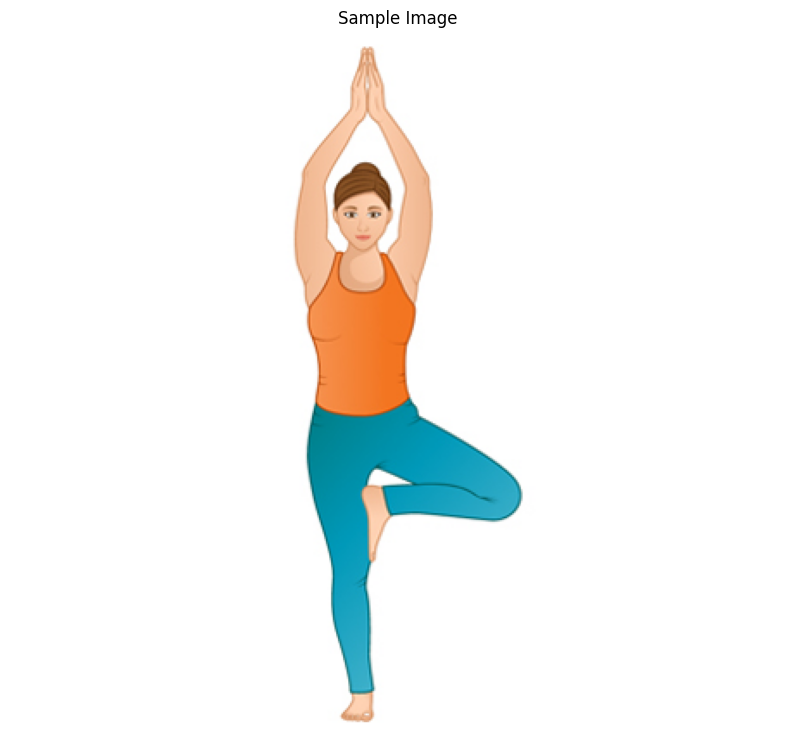

In [ ]:
#block 2
'''
line 1 -> store the file path in image_path
line 2 -> read the image using imread function
if..else -> understandable by us
            but why [:, :, ::-1]
              -> : no.of.rows
              -> : no.of.columns
              -> ::-1 convert BGR to RGB since opencv reads in BGR while matplotlib uses RGB
'''

# Specify the file path to your image
image_path = '/media/tree.jpg'

# Attempt to read the image
sample_img = cv2.imread(image_path)

# Check if the image was successfully loaded
if sample_img is not None:
    plt.figure(figsize=[10, 10])
    plt.title("Sample Image")
    plt.axis('off')
    plt.imshow(sample_img[:, :, ::-1])  # Display the image in RGB format
    plt.show()
else:
    print(f"Failed to load the image at '{image_path}'")


In [ ]:
#block 3
'''
Line 1 -> This line processes the input image (sample_img) through the pose detection model (pose).
          Before passing the image to the model, it's converted from the BGR color space to the RGB color space using OpenCV's cv2.cvtColor() function.
          The output of this line is stored in the variable results, which contains the pose detection results.

Line 2 -> This conditional statement checks if any pose landmarks were detected in the image.
          If pose landmarks are detected (i.e., if results.pose_landmarks is not empty), the code inside the block will be executed.

Line 3 -> This loop iterates over the range of indices from 0 to 32 (inclusive).
          This range corresponds to the indices of the 33 pose landmarks that can be detected by the MediaPipe pose detection model.

Line 4 -> Within the loop, this line prints the name and coordinates of each pose landmark detected in the image.
          mp_pose.PoseLandmark(i).name : This retrieves the name of the pose landmark at index i using the PoseLandmark enumeration provided by MediaPipe.
          results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value] : This accesses the landmark coordinates of the pose landmark at index i from
                                                                           the pose_landmarks attribute of the results object.

Overall execution
  This code processes an image through a pose detection model and prints the name and coordinates of each detected pose landmark if any are found in the image.
'''

results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
if results.pose_landmarks :
  for i in range(33):
    print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.454086334
y: 0.271788985
z: -0.382752091
visibility: 0.999585927

LEFT_EYE_INNER:
x: 0.462960839
y: 0.254988581
z: -0.344460607
visibility: 0.999612153

LEFT_EYE:
x: 0.469398707
y: 0.255567849
z: -0.344875187
visibility: 0.999480784

LEFT_EYE_OUTER:
x: 0.47508806
y: 0.256816834
z: -0.344840229
visibility: 0.999694

RIGHT_EYE_INNER:
x: 0.448211908
y: 0.254670203
z: -0.354639202
visibility: 0.999726236

RIGHT_EYE:
x: 0.443565518
y: 0.254717112
z: -0.355151296
visibility: 0.999664545

RIGHT_EYE_OUTER:
x: 0.438649535
y: 0.254802287
z: -0.355362087
visibility: 0.999783814

LEFT_EAR:
x: 0.479801446
y: 0.262677491
z: -0.157776028
visibility: 0.999602258

RIGHT_EAR:
x: 0.42844975
y: 0.262495339
z: -0.202285275
visibility: 0.999135196

MOUTH_LEFT:
x: 0.464001507
y: 0.289812058
z: -0.309044719
visibility: 0.998262942

MOUTH_RIGHT:
x: 0.446815938
y: 0.287967354
z: -0.325467825
visibility: 0.998663425

LEFT_SHOULDER:
x: 0.509205401
y: 0.336694032
z: -0.0872874632
visibility: 0.998481929

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
#block 4
'''
Line 1 -> This line extracts the height and width of the sample_img image using the .shape attribute of the NumPy array representing the image.
          The shape attribute returns a tuple containing the dimensions of the image in the order (height, width, channels), where channels represent the color channels (e.g., RGB).

Line 2 -> This conditional statement checks if any pose landmarks were detected in the image.
          If pose landmarks are detected (i.e., if results.pose_landmarks is not empty), the code inside the block will be executed.

Line 3 -> This loop iterates over the range of indices from 0 to 32 (inclusive).
          This range corresponds to the indices of the 33 pose landmarks that can be detected by the MediaPipe pose detection model.

Line 4 -> This line prints the name of the pose landmark at index i using the PoseLandmark enumeration provided by MediaPipe.

Line 5 -> This line prints the x-coordinate of the pose landmark at index i.
          It multiplies the normalized x-coordinate (x) by image_width to convert it from a normalized coordinate (ranging from 0.0 to 1.0)
          to the pixel coordinate in the width of the image.

Line 6 -> This line prints the y-coordinate of the pose landmark at index i.
          Similar to the previous line, it multiplies the normalized y-coordinate (y) by image_width to convert it to the pixel coordinate in the height of the image.

Line 7 -> This line prints the z-coordinate of the pose landmark at index i.
          Similar to the previous lines, it multiplies the normalized z-coordinate (z) by image_width to convert it to the pixel coordinate in the depth (or z-axis) of the image.

Line 8 -> This line prints the visibility of the pose landmark at index i. The visibility indicates the confidence level of the detection for that landmark.

Overall, this code processes the detected pose landmarks and prints their names, x, y, and z coordinates (scaled to the dimensions of the input image), and visibility.
'''

image_height, image_width,_= sample_img.shape
if results.pose_landmarks:
  for i in range(33):
    print(f'{mp_pose.PoseLandmark(i).name}:')
    print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
    print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_width}')
    print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
    print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 203.8847637474537
y: 122.03325405716896
z: -171.85568872094154
visibility: 0.9995859265327454

LEFT_EYE_INNER:
x: 207.8694168329239
y: 114.48987284302711
z: -154.66281235218048
visibility: 0.9996121525764465

LEFT_EYE:
x: 210.76001951098442
y: 114.7499640583992
z: -154.8489588201046
visibility: 0.9994807839393616

LEFT_EYE_OUTER:
x: 213.31453889608383
y: 115.31075856089592
z: -154.83326262235641
visibility: 0.9996939897537231

RIGHT_EYE_INNER:
x: 201.2471468448639
y: 114.3469210267067
z: -159.233001857996
visibility: 0.9997262358665466

RIGHT_EYE:
x: 199.1609174311161
y: 114.36798310279846
z: -159.4629317522049
visibility: 0.9996645450592041

RIGHT_EYE_OUTER:
x: 196.95364129543304
y: 114.40622669458389
z: -159.55757728219032
visibility: 0.9997838139533997

LEFT_EAR:
x: 215.43084934353828
y: 117.94219332933426
z: -70.84143653512001
visibility: 0.9996022582054138

RIGHT_EAR:
x: 192.3739377260208
y: 117.86040717363358
z: -90.82608841359615
visibility: 0.9991351962089539

MOUTH_LE

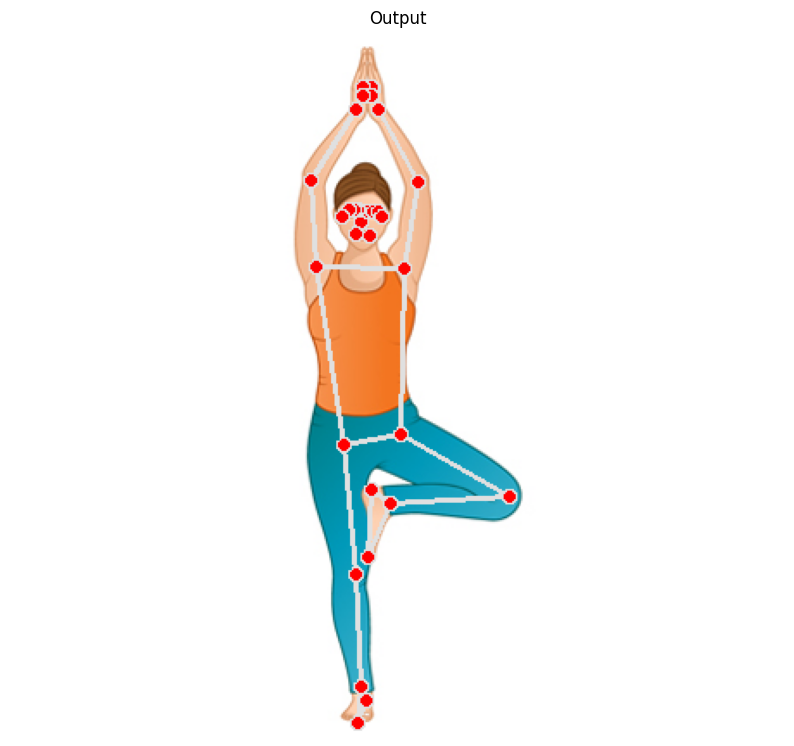

In [ ]:
#block 5
'''
Line 1 -> This line creates a copy of the original image sample_img using the copy() method.
          This is done to ensure that any modifications made to img_copy do not affect the original image.

Line 2 -> This conditional statement checks if any pose landmarks were detected in the image.
          If pose landmarks are detected (i.e., if results.pose_landmarks is not empty), the code inside the block will be executed.

Line 3 -> This line draws the detected pose landmarks and connections (lines connecting landmarks) on the img_copy image.
          It uses the draw_landmarks() function from the mp_drawing module, passing in the following arguments,
            image=img_copy : The image on which landmarks will be drawn.
            landmark_list=results.pose_landmarks : The list of detected pose landmarks to be drawn.
            connections=mp_pose.POSE_CONNECTIONS : Specifies which connections (lines) to draw between the landmarks.
                                                   mp_pose.POSE_CONNECTIONS provides the default connections defined by MediaPipe for pose detection.

Line 4 -> This line creates a new figure for plotting using Matplotlib. It sets the figure size to 10x10 inches.

Line 5 -> This line sets the title of the plot to "Output".
          This line turns off the axis labels and ticks in the plot.
          This line displays the modified image (img_copy) in the plot.
          The [:,:,::-1] slicing reverses the order of color channels from BGR to RGB because Matplotlib expects images in RGB format.
          This line displays the plot containing the image with pose landmarks and connections.

Overall, this code segment processes the detected pose landmarks, draws them on a copy of the original image, and then displays the annotated image using Matplotlib.
'''

img_copy = sample_img.copy()
if results.pose_landmarks:
  mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
  fig = plt.figure(figsize = [10,10])
  plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

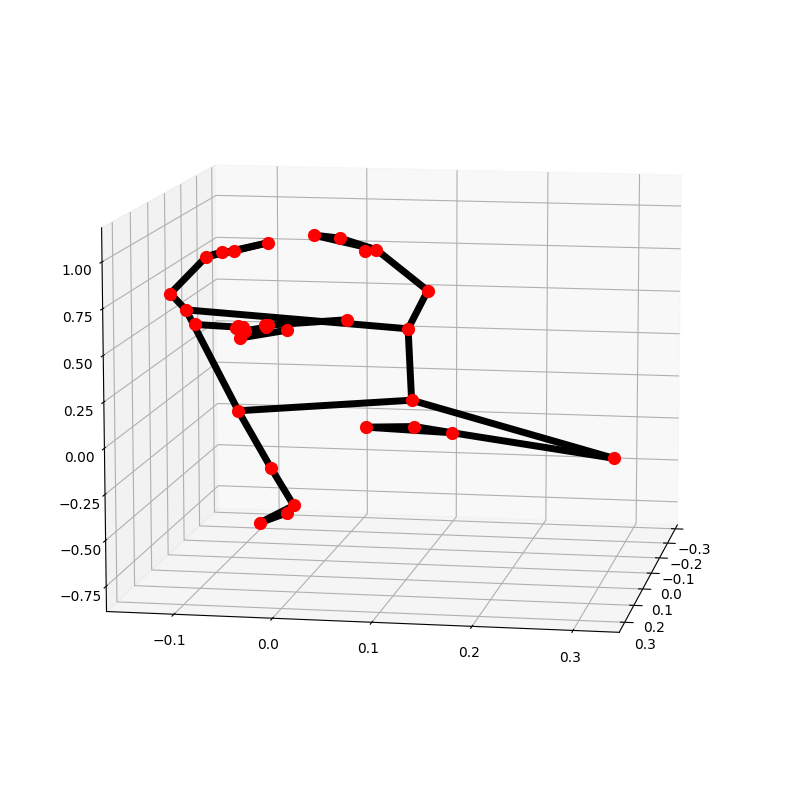

In [ ]:
'''

'''
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [ ]:
def detectPose(image, pose, display=True):
  output_image = image.copy()
  imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = pose.process(imageRGB)
  height, width, _ = image.shape
  landmarks = []
  if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    for landmark in results.pose_landmarks.landmark:
      landmarks.append((int(landmark.x * width), int(landmark.y * height), int(landmark.x * width)))
  if display:
    plt.figure(figsize=[22,22])
    plt.subplot(121);plt.imshow(image[:, :, ::-1]);plt.title("Original Image");plt.axis('off');
    plt.subplot(122);plt.imshow(output_image[:, :, ::-1]);plt.title("Output Image");plt.axis('off');
    mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)
  else:
    return output_image, landmarks

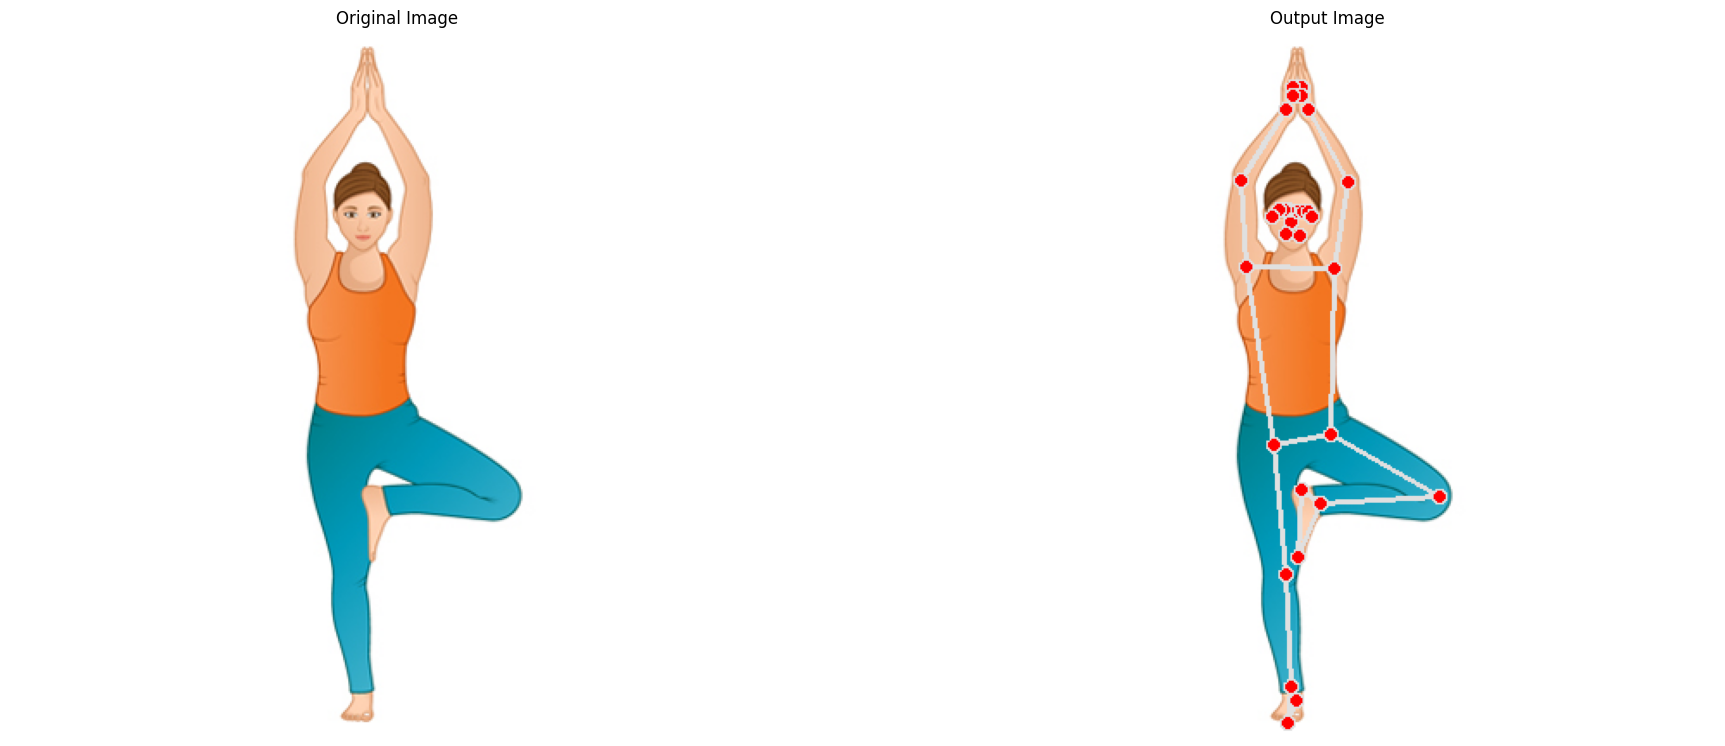

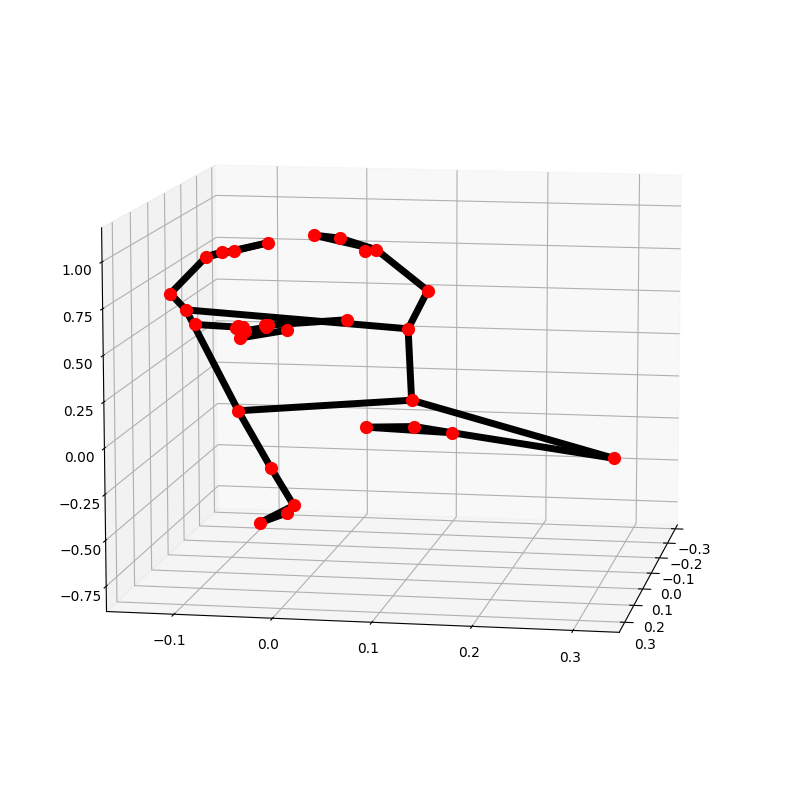

In [ ]:
image = cv2.imread('/media/tree.jpg')
detectPose(image, pose, display = True)

In [ ]:
def calculateAngle(landmark1, landmark2, landmark3):
  x1, y1, _ = landmark1
  x2, y2, _ = landmark2
  x3, y3, _ = landmark3
  angle = math.degrees(math.atan2(y3-y2, x3-x2) - math.atan2(y1-y2, x1-x2))
  if angle < 0:
    angle += 360
  return angle

In [ ]:
#block 7

# This function classifyPose takes pose landmarks as input and classifies the pose based on the angles formed by various body parts.
def classifyPose(landmarks, output_image, display = False):
  '''
    This line defines a function named classifyPose which takes three parameters
    landmarks (the detected pose landmarks),
    output_image (the image on which the pose classification will be annotated),
    and an optional parameter display (to determine whether to display the annotated image).
  '''
  label = 'Unknown Pose'
  color = (0, 0, 255)
  left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
  right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
  left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
  right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
  left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
  right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
  if  left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
    if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
      if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
          label = 'Warrior II Pose'
      if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and rught_knee_angle < 195:
        label = 'T Pose'
  if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
    if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:
      label = 'Tree Pose'
  if label != 'Unknown Pose':
    color = (255, 255, 0)
  cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
  if display:
    plt.figure(figsize = [10, 10])
    plt.imshow(output_image[:, :, ::-1]);plt.title('Output Image');plt.axis('off');
  else:
    return output_image, label

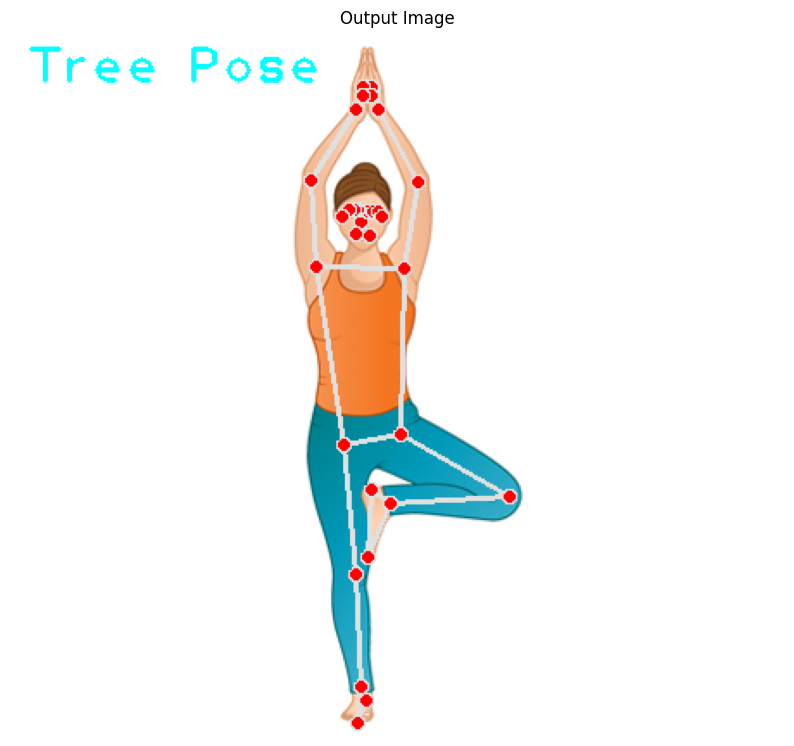

In [ ]:
image = cv2.imread('/media/tree.jpg')
output_image, landmarks = detectPose(image, pose, display = False)
if landmarks:
  classifyPose(landmarks, output_image, display = True)


In [ ]:
model = mp_pose.Pose()

In [ ]:
path = '/media/tree.jpg'
image = cv2.imread(path)
if image is not None:
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = pose.process(image_rgb)